In [6]:
from utils import FashionMNIST, Trainer
from model import Classification, MLPClassificationModel, MLPClassificationDropout, LeNet

In [2]:
# Load data
data = FashionMNIST(batch_size=256)

# Linear Implementation

Final Train Loss: 1.7667


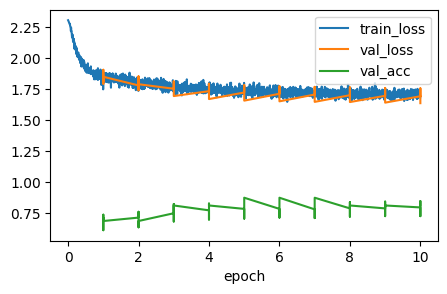

In [3]:
model = Classification(num_inputs=784, num_outputs=10, lr=0.1)
trainer = Trainer(max_epochs=10)
trainer.fit(model, data)

# MLP Implementation

Final Train Loss: 0.4802


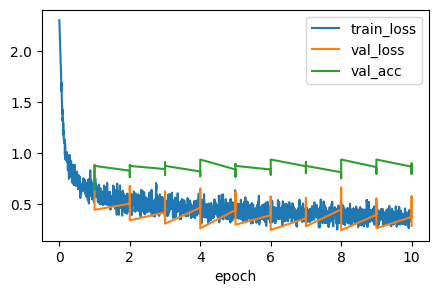

In [4]:
model = MLPClassificationModel(num_outputs=10, num_hiddens=256, lr=0.1)
trainer = Trainer(max_epochs=10)
trainer.fit(model, data)

## Implementation with dropout regularization

Final Train Loss: 0.5687


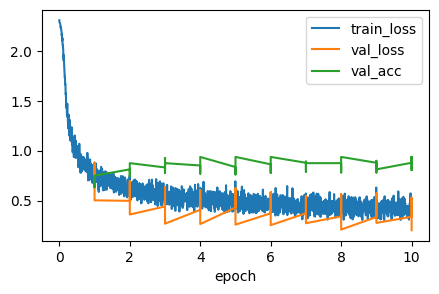

In [7]:
hparams = {'num_outputs':10, 'num_hiddens_1':256, 'num_hiddens_2':256,
           'dropout_1':0.5, 'dropout_2':0.5, 'lr':0.1}
model = MLPClassificationDropout(**hparams)
trainer = Trainer(max_epochs=10)
trainer.fit(model, data)

# LeNet Implementation

In [8]:
import torch.nn as nn

def init_cnn(module):
    """
    Uniform Xavier parameter initialization
    x = sqrt(6 / n_in + n_out)
    """
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

Final Train Loss: 1.9818


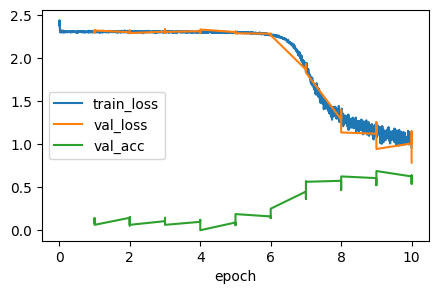

In [9]:
trainer = Trainer(max_epochs=10, num_gpus=1)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)